In [117]:
import pandas as pd

In [118]:
data=pd.read_excel('/content/drive/MyDrive/Argo AI/AI ML Internship Training Data.xlsx')

In [119]:
print(data.head())

  Shipment ID     Origin Destination Shipment Date Planned Delivery Date  \
0  SHIP000000     Jaipur      Mumbai    2023-04-26            2023-05-01   
1  SHIP000001  Bangalore       Delhi    2023-02-09            2023-02-13   
2  SHIP000002     Mumbai     Chennai    2023-09-19            2023-09-25   
3  SHIP000003  Hyderabad   Ahmedabad    2023-04-01            2023-04-05   
4  SHIP000004    Chennai     Kolkata    2023-11-24            2023-11-26   

  Actual Delivery Date Vehicle Type  Distance (km) Weather Conditions  \
0           2023-05-02      Trailer           1603               Rain   
1           2023-02-17      Trailer           1237              Storm   
2           2023-09-25        Truck           1863              Clear   
3           2023-04-05    Container           1374              Clear   
4           2023-11-28    Container            676              Clear   

  Traffic Conditions Delayed  
0              Light     Yes  
1           Moderate     Yes  
2          

In [120]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Shipment ID            20000 non-null  object        
 1   Origin                 20000 non-null  object        
 2   Destination            20000 non-null  object        
 3   Shipment Date          20000 non-null  datetime64[ns]
 4   Planned Delivery Date  20000 non-null  datetime64[ns]
 5   Actual Delivery Date   20000 non-null  datetime64[ns]
 6   Vehicle Type           19403 non-null  object        
 7   Distance (km)          20000 non-null  int64         
 8   Weather Conditions     20000 non-null  object        
 9   Traffic Conditions     20000 non-null  object        
 10  Delayed                20000 non-null  object        
dtypes: datetime64[ns](3), int64(1), object(7)
memory usage: 1.7+ MB
None


In [121]:
print(data[data['Vehicle Type'].isnull()].groupby(['Origin', 'Destination']).size())


Origin     Destination
Ahmedabad  Bangalore      7
           Chennai        4
           Delhi          8
           Hyderabad      3
           Jaipur         6
                         ..
Pune       Hyderabad      4
           Jaipur         9
           Kolkata        9
           Lucknow        8
           Mumbai         7
Length: 90, dtype: int64


In [122]:
data['Vehicle Type'].fillna('Unknown', inplace=True)


<ipython-input-122-25bdfb292e09>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Vehicle Type'].fillna('Unknown', inplace=True)


In [123]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Shipment ID            20000 non-null  object        
 1   Origin                 20000 non-null  object        
 2   Destination            20000 non-null  object        
 3   Shipment Date          20000 non-null  datetime64[ns]
 4   Planned Delivery Date  20000 non-null  datetime64[ns]
 5   Actual Delivery Date   20000 non-null  datetime64[ns]
 6   Vehicle Type           20000 non-null  object        
 7   Distance (km)          20000 non-null  int64         
 8   Weather Conditions     20000 non-null  object        
 9   Traffic Conditions     20000 non-null  object        
 10  Delayed                20000 non-null  object        
dtypes: datetime64[ns](3), int64(1), object(7)
memory usage: 1.7+ MB
None


In [124]:
data.duplicated().any()

False

In [125]:
data.columns = data.columns.str.strip().str.lower().str.replace(' ', '_')

In [126]:
print(data.head())

  shipment_id     origin destination shipment_date planned_delivery_date  \
0  SHIP000000     Jaipur      Mumbai    2023-04-26            2023-05-01   
1  SHIP000001  Bangalore       Delhi    2023-02-09            2023-02-13   
2  SHIP000002     Mumbai     Chennai    2023-09-19            2023-09-25   
3  SHIP000003  Hyderabad   Ahmedabad    2023-04-01            2023-04-05   
4  SHIP000004    Chennai     Kolkata    2023-11-24            2023-11-26   

  actual_delivery_date vehicle_type  distance_(km) weather_conditions  \
0           2023-05-02      Trailer           1603               Rain   
1           2023-02-17      Trailer           1237              Storm   
2           2023-09-25        Truck           1863              Clear   
3           2023-04-05    Container           1374              Clear   
4           2023-11-28    Container            676              Clear   

  traffic_conditions delayed  
0              Light     Yes  
1           Moderate     Yes  
2          

In [127]:
data = data.drop(columns=['shipment_id'])


In [128]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   origin                 20000 non-null  object        
 1   destination            20000 non-null  object        
 2   shipment_date          20000 non-null  datetime64[ns]
 3   planned_delivery_date  20000 non-null  datetime64[ns]
 4   actual_delivery_date   20000 non-null  datetime64[ns]
 5   vehicle_type           20000 non-null  object        
 6   distance_(km)          20000 non-null  int64         
 7   weather_conditions     20000 non-null  object        
 8   traffic_conditions     20000 non-null  object        
 9   delayed                20000 non-null  object        
dtypes: datetime64[ns](3), int64(1), object(6)
memory usage: 1.5+ MB
None


In [129]:
data['delayed'].value_counts(normalize=True)

,proportion
delayed,
Yes,0.73785
No,0.26215


In [130]:
data.groupby('delayed')['distance_(km)'].describe()


,count,mean,std,min,25%,50%,75%,max
delayed,,,,,,,,
No,5243.0,1100.764257,524.110367,200.0,638.5,1110.0,1552.0,2000.0
Yes,14757.0,1101.983330,519.524682,200.0,653.0,1099.0,1551.0,2000.0


The mean, median, and percentiles for distance are very similar between delayed and non-delayed shipments. This suggests that distance might not be a strong factor contributing to delays.

Both groups show considerable variation in the distances, as evidenced by the high standard deviations. This could indicate that other factors might play a more significant role in delays than the distance itself.





In [131]:
data.groupby(['weather_conditions', 'delayed']).size().unstack()

delayed,No,Yes
weather_conditions,,
Clear,5243.0,8709.0
Fog,NaN,2014.0
Rain,NaN,3067.0
Storm,NaN,967.0


Clear weather seems to have a significant number of both delayed and non-delayed shipments. However, the proportion of delayed shipments is higher.

Fog, rain, and storm conditions have no non-delayed shipments, which suggests that shipments in these conditions are almost always delayed. This could be an important feature in predicting delays, as certain weather conditions seem to have a near-100% chance of resulting in delays.

In [132]:
data.groupby(['traffic_conditions', 'delayed']).size().unstack()

delayed,No,Yes
traffic_conditions,,
Heavy,NaN,3072.0
Light,5243.0,4707.0
Moderate,NaN,6978.0


There is a strong correlation between traffic conditions and shipment delays. Heavy and moderate traffic are strongly linked to delays, while light traffic still results in a significant number of delays.



In [133]:
data.groupby(['vehicle_type', 'delayed']).size().unstack()

delayed,No,Yes
vehicle_type,,
Container,1285,3542
Lorry,1299,3579
Trailer,1244,3594
Truck,1256,3604
Unknown,159,438


All vehicle types show more delayed shipments than non-delayed ones

In [134]:
data.groupby(['origin', 'delayed']).size().unstack()

delayed,No,Yes
origin,,
Ahmedabad,514,1461
Bangalore,530,1500
Chennai,499,1480
Delhi,547,1496
Hyderabad,515,1462
Jaipur,491,1414
Kolkata,528,1445
Lucknow,521,1402
Mumbai,553,1525


This analysis indicates that delays are a common occurrence across all origin cities, with a higher number of delayed shipments. However, there seems to be no large variation across different origins.

In [135]:
data.groupby(['destination', 'delayed']).size().unstack()

delayed,No,Yes
destination,,
Ahmedabad,510,1502
Bangalore,530,1502
Chennai,560,1482
Delhi,525,1457
Hyderabad,466,1487
Jaipur,563,1481
Kolkata,497,1445
Lucknow,551,1477
Mumbai,524,1452


The data shows that delayed shipments are more common across all destination cities, and there is a consistent pattern of delays across destinations. The small variations in the number of delayed shipments suggest that the destination itself might not be the most significant factor causing delays

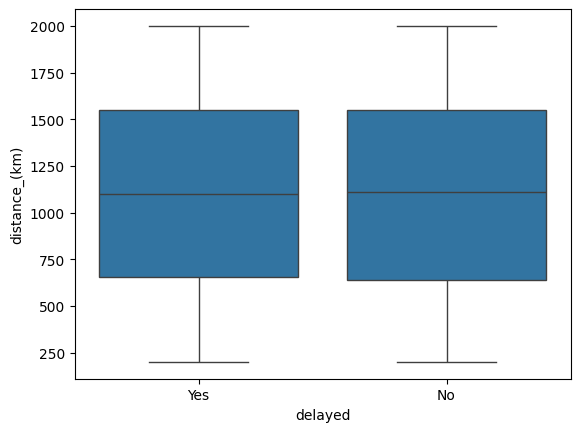

In [136]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.boxplot(x='delayed', y='distance_(km)', data=data)
plt.show()


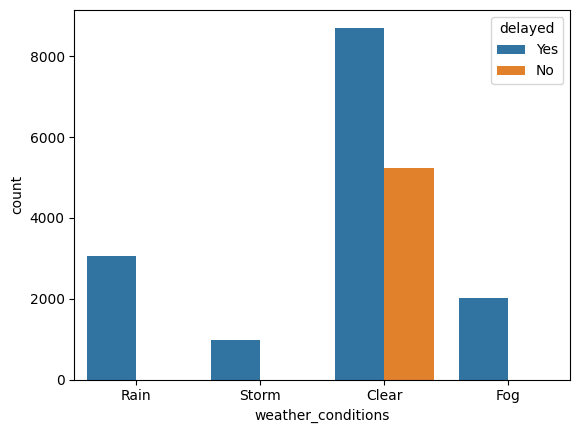

In [137]:
sns.countplot(x='weather_conditions', hue='delayed', data=data)
plt.show()


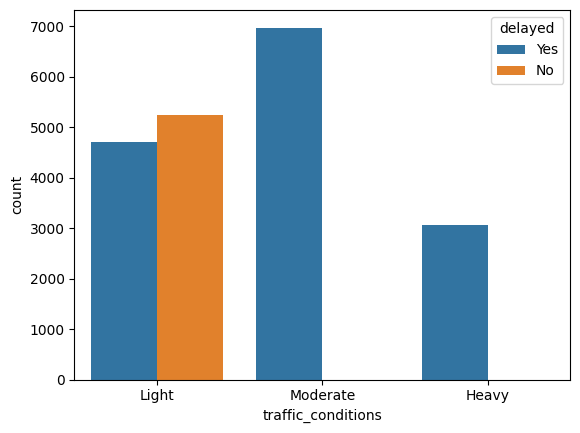

In [138]:
sns.countplot(x='traffic_conditions', hue='delayed', data=data)
plt.show()


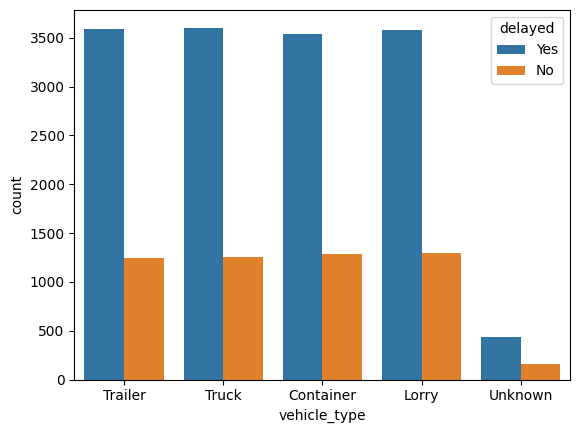

In [139]:
sns.countplot(x='vehicle_type', hue='delayed', data=data)
plt.show()


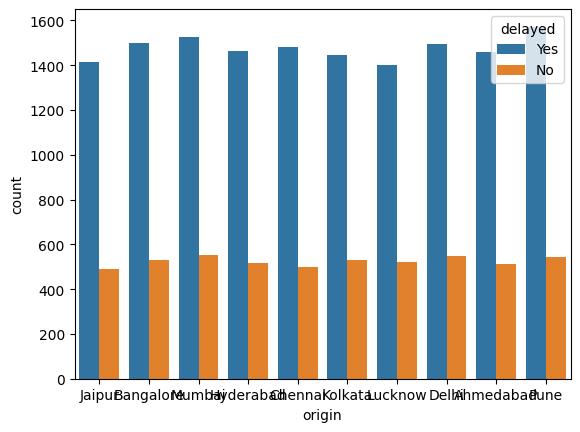

In [140]:
sns.countplot(x='origin', hue='delayed', data=data)
plt.show()


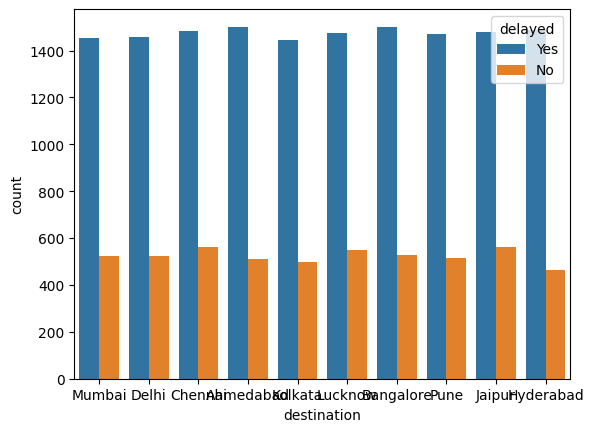

In [141]:
sns.countplot(x='destination', hue='delayed', data=data)
plt.show()


In [142]:
columns_to_encode = ['origin', 'destination', 'weather_conditions', 'traffic_conditions', 'vehicle_type',]
data_encoded = pd.get_dummies(data, columns=columns_to_encode, drop_first=False)

In [143]:
print(data_encoded.head())

  shipment_date planned_delivery_date actual_delivery_date  distance_(km)  \
0    2023-04-26            2023-05-01           2023-05-02           1603   
1    2023-02-09            2023-02-13           2023-02-17           1237   
2    2023-09-19            2023-09-25           2023-09-25           1863   
3    2023-04-01            2023-04-05           2023-04-05           1374   
4    2023-11-24            2023-11-26           2023-11-28            676   

  delayed  origin_Ahmedabad  origin_Bangalore  origin_Chennai  origin_Delhi  \
0     Yes             False             False           False         False   
1     Yes             False              True           False         False   
2      No             False             False           False         False   
3      No             False             False           False         False   
4     Yes             False             False            True         False   

   origin_Hyderabad  ...  weather_conditions_Rain  weather_con

In [144]:

data_encoded['delayed'] = data_encoded['delayed'].map({'Yes': 1, 'No': 0})


In [145]:
print(data_encoded.head())

  shipment_date planned_delivery_date actual_delivery_date  distance_(km)  \
0    2023-04-26            2023-05-01           2023-05-02           1603   
1    2023-02-09            2023-02-13           2023-02-17           1237   
2    2023-09-19            2023-09-25           2023-09-25           1863   
3    2023-04-01            2023-04-05           2023-04-05           1374   
4    2023-11-24            2023-11-26           2023-11-28            676   

   delayed  origin_Ahmedabad  origin_Bangalore  origin_Chennai  origin_Delhi  \
0        1             False             False           False         False   
1        1             False              True           False         False   
2        0             False             False           False         False   
3        0             False             False           False         False   
4        1             False             False            True         False   

   origin_Hyderabad  ...  weather_conditions_Rain  weath

In [146]:
data_encoded.corr()

,shipment_date,planned_delivery_date,actual_delivery_date,distance_(km),delayed,origin_Ahmedabad,origin_Bangalore,origin_Chennai,origin_Delhi,origin_Hyderabad,...,weather_conditions_Rain,weather_conditions_Storm,traffic_conditions_Heavy,traffic_conditions_Light,traffic_conditions_Moderate,vehicle_type_Container,vehicle_type_Lorry,vehicle_type_Trailer,vehicle_type_Truck,vehicle_type_Unknown
shipment_date,1.000000,0.999933,0.999852,-0.006205,-0.013251,0.005704,-0.001164,-0.006071,0.003400,0.004632,...,-0.002103,-0.008586,-0.000181,-0.002630,0.002896,0.009524,0.001537,-0.010387,-0.000047,-0.001571
planned_delivery_date,0.999933,1.000000,0.999907,0.004868,-0.013088,0.005675,-0.001096,-0.006300,0.003402,0.004707,...,-0.002026,-0.008487,-0.000043,-0.002762,0.002930,0.009551,0.001413,-0.010293,-0.000028,-0.001611
actual_delivery_date,0.999852,0.999907,1.000000,0.004784,-0.005402,0.005800,-0.000992,-0.006321,0.003342,0.004703,...,-0.000584,-0.004936,0.003626,-0.006983,0.004582,0.009462,0.001268,-0.010056,-0.000006,-0.001673
distance_(km),-0.006205,0.004868,0.004784,1.000000,0.001030,-0.001211,0.007150,-0.022742,-0.001909,0.009270,...,0.004202,-0.001828,0.006047,-0.006934,0.002700,0.002484,-0.009628,0.007241,0.000086,-0.000386
delayed,-0.013251,-0.013088,-0.005402,0.001030,1.000000,0.001428,0.000815,0.007537,-0.004290,0.001246,...,0.253677,0.134354,0.253921,-0.599049,0.436332,-0.005208,-0.005356,0.006446,0.004784,-0.001668
origin_Ahmedabad,0.005704,0.005675,0.005800,-0.001211,0.001428,1.000000,-0.111255,-0.109693,-0.111651,-0.109632,...,0.000062,-0.007416,-0.001097,0.005510,-0.004950,-0.005745,0.009093,0.000880,-0.001925,-0.005864
origin_Bangalore,-0.001164,-0.001096,-0.000992,0.007150,0.000815,-0.111255,1.000000,-0.111380,-0.113368,-0.111318,...,0.007673,-0.002432,0.006058,-0.000969,-0.003567,0.000797,-0.006599,-0.000022,0.001818,0.010123
origin_Chennai,-0.006071,-0.006300,-0.006321,-0.022742,0.007537,-0.109693,-0.111380,1.000000,-0.111777,-0.109755,...,-0.008588,0.010394,-0.001381,-0.011237,0.012833,0.003275,0.009874,-0.009275,-0.006597,0.006816
origin_Delhi,0.003400,0.003402,0.003342,-0.001909,-0.004290,-0.111651,-0.113368,-0.111777,1.000000,-0.111714,...,0.003989,0.010176,0.010163,0.005814,-0.013788,0.012317,0.002965,-0.018584,0.007141,-0.009686
origin_Hyderabad,0.004632,0.004707,0.004703,0.009270,0.001246,-0.109632,-0.111318,-0.109755,-0.111714,1.000000,...,0.000849,-0.004364,0.008518,-0.002867,-0.003436,-0.008671,0.003827,0.015164,-0.008363,-0.004935


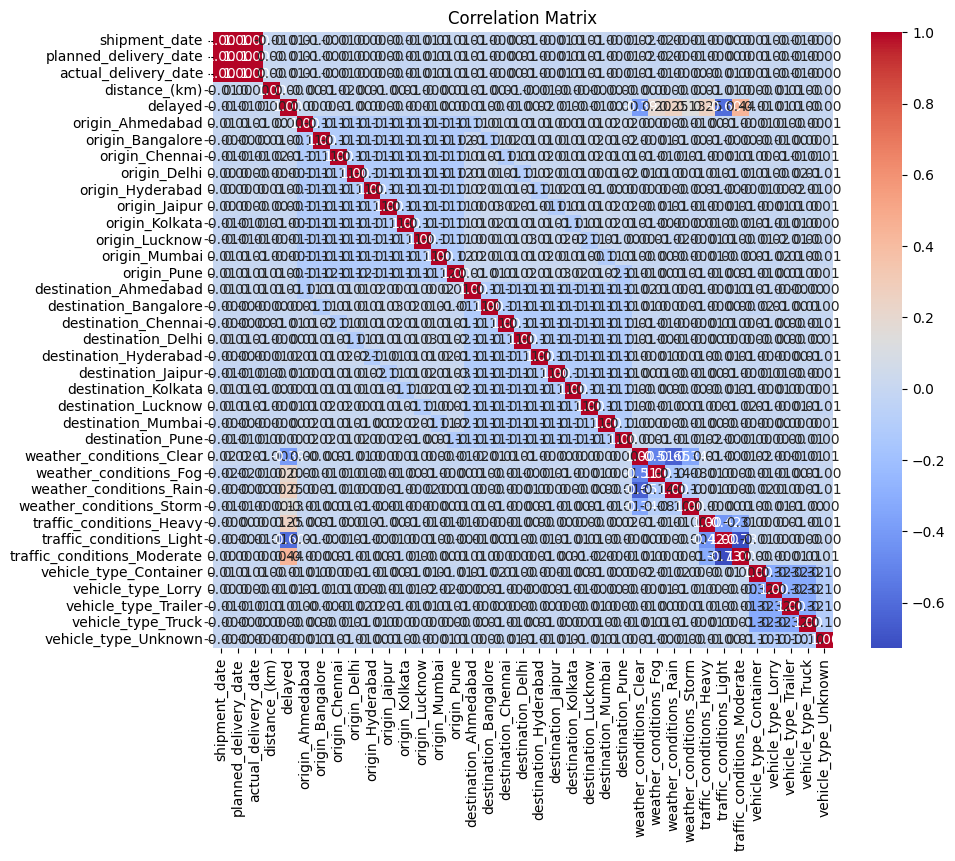

In [147]:
correlation_matrix=data_encoded.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', cbar=True)
plt.title("Correlation Matrix")
plt.show()

In [148]:
data_encoded = data_encoded.drop(columns=['actual_delivery_date'])

In [150]:
data_encoded['shipment_date'] = data_encoded['shipment_date'].astype(int) / 10**9
data_encoded['planned_delivery_date'] = data_encoded['planned_delivery_date'].astype(int) / 10**9
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data_encoded[['shipment_date', 'planned_delivery_date']] = scaler.fit_transform(data_encoded[['shipment_date', 'planned_delivery_date']])


In [151]:
print(data_encoded.head())

   shipment_date  planned_delivery_date  distance_(km)  delayed  \
0      -0.002611              -0.943530           1603        1   
1      -1.538717              -1.456498           1237        1   
2      -0.002611               0.035774           1863        0   
3      -1.538717              -1.116740           1374        0   
4      -0.002611               0.448813            676        1   

   origin_Ahmedabad  origin_Bangalore  origin_Chennai  origin_Delhi  \
0             False             False           False         False   
1             False              True           False         False   
2             False             False           False         False   
3             False             False           False         False   
4             False             False            True         False   

   origin_Hyderabad  origin_Jaipur  ...  weather_conditions_Rain  \
0             False           True  ...                     True   
1             False          False

In [162]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import StandardScaler
import joblib

X = data_encoded.drop(columns=['delayed'])
y = data_encoded['delayed']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


model1 = LogisticRegression(max_iter=5000)
model2 = DecisionTreeClassifier()
model3 = RandomForestClassifier()


model1.fit(X_train_scaled, y_train)
y_pred1 = model1.predict(X_test_scaled)

print("Logistic Regression Performance:")
print(f"Accuracy: {accuracy_score(y_test, y_pred1):.4f}")
print(f"Precision: {precision_score(y_test, y_pred1, average='binary'):.4f}")
print(f"Recall: {recall_score(y_test, y_pred1, average='binary'):.4f}")
print(f"F1 Score: {f1_score(y_test, y_pred1, average='binary'):.4f}")
print("-" * 40)

joblib.dump(model1, 'logistic_regression_model_final.pkl')
joblib.dump(scaler, 'scaler_final.pkl')  # Scaler only for Logistic Regression

model2.fit(X_train, y_train)
y_pred2 = model2.predict(X_test)

print("Decision Tree Performance:")
print(f"Accuracy: {accuracy_score(y_test, y_pred2):.4f}")
print(f"Precision: {precision_score(y_test, y_pred2, average='binary'):.4f}")
print(f"Recall: {recall_score(y_test, y_pred2, average='binary'):.4f}")
print(f"F1 Score: {f1_score(y_test, y_pred2, average='binary'):.4f}")
print("-" * 40)

joblib.dump(model2, 'decision_tree_model_final.pkl')


model3.fit(X_train, y_train)
y_pred3 = model3.predict(X_test)

print("Random Forest Performance:")
print(f"Accuracy: {accuracy_score(y_test, y_pred3):.4f}")
print(f"Precision: {precision_score(y_test, y_pred3, average='binary'):.4f}")
print(f"Recall: {recall_score(y_test, y_pred3, average='binary'):.4f}")
print(f"F1 Score: {f1_score(y_test, y_pred3, average='binary'):.4f}")
print("-" * 40)




joblib.dump(model3, 'random_forest_model_final.pkl')


Logistic Regression Performance:
Accuracy: 0.9115
Precision: 1.0000
Recall: 0.8796
F1 Score: 0.9360
----------------------------------------
Decision Tree Performance:
Accuracy: 0.8645
Precision: 0.9048
Recall: 0.9116
F1 Score: 0.9082
----------------------------------------
Random Forest Performance:
Accuracy: 0.8965
Precision: 0.9713
Recall: 0.8854
F1 Score: 0.9264
----------------------------------------


['random_forest_model_final.pkl']

Logistic Regression performs the best overall, as indicated by the highest F1 Score (0.9360). While Random Forest is close, Logistic Regression achieves perfect precision (1.0000) while maintaining a high recall (0.8796).